# Projeto 2 - Ciência dos Dados

- Alex Steijntjes
- Enzo Neto
- Isabella Fuhrken
- Isabella Oliveira

# Introdução:

### Tema: Previsão se uma determinada música tem perfil de sucesso ou não baseado em seus aspectos.

Para o Projeto 2 da disciplina de Ciência dos Dados, foi selecionado como **tema** a análise do sucesso de uma música baseado em seus aspectos. Para isso selecionamos um DataFrame existente da Internet e analisamos os fatores que influenciam o sucesso de uma música. 

Deste modo, para auxiliar na pesquisa, utilizamos as seguintes **bibliotecas**:

•	**Pandas:** utilizada para a análise e manipulação de DataFrames em geral, construído com base na linguagem Python.

•	**NumPy:** biblioteca Python utilizada para o cálculo de matrizes, além de  possibilitar  o trabalho no domínio da álgebra linear, transformada de Fourier e matrizes. 

Para a implementação da **Árvore de decisão** e da **Regressão Logística**, as seguintes bibliotecas foram utilizadas:

•	**Matplotlib:** biblioteca que trabalha em conjunto com a NumPy. Ela permite embutir gráficos em aplicativos, ajudando na análise visual e exploratória dos dados.

•	**Seaborn:** biblioteca que auxilia na análise de dados Python, baseada na matplotlib. Ele fornece uma interface para desenhar diversos gráficos estatísticos e informativos.

•	**SkLearn:** contém muitas ferramentas eficientes para a análise e modelagem estatística, englobando classificação, regressão, agrupamento e redução de dimensionalidade. Em geral, a SkLearn é usada para construir modelos de aprendizado de máquina.

Além dessas mencionadas, a biblioteca **Ipython.Display Image**, faz com que quando um objeto é retornado por uma célula de entrada ou transmitido para a função de exibição, uma imagem será projetada, sendo exibida no frontend.

O **PyDotPlus** é uma versão aprimorada do antigo projeto pydot que fornece uma interface Python para a linguagem Dot do Graphviz.

A **StringIO** é uma biblioteca em Python que permite representar strings de um modo que se comportam como se fossem arquivos (com a mesma interface dos objetos file), mas que ficam residentes em memória, como strings comuns.



In [138]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np

# Bibliotecas necessárias para o modelo 1 (Árvore de decisão)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree, datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus
from six import StringIO

#Bibliotecas necessárias para o modelo 2 (Regressão logística), que não foram utilizadas anteriormente.
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [139]:
# Lendo o banco de dados
data_0 = pd.read_csv("data.csv")

In [140]:
# Rodando as primeiras 5 linhas do banco de dados
data_0.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [141]:
# Filtrando as colunas
data = data_0.loc[:,["tempo", "target","speechiness", "loudness", "energy", "instrumentalness", "duration_ms", "danceability", "acousticness"]]

In [142]:
# Rodando as primeiras linhas depois de filtrar
data.head()

,tempo,target,speechiness,loudness,energy,instrumentalness,duration_ms,danceability,acousticness
0,150.062,1,0.4310,-8.795,0.434,0.021900,204600,0.833,0.0102
1,160.083,1,0.0794,-10.401,0.359,0.006110,326933,0.743,0.1990
2,75.044,1,0.2890,-7.148,0.412,0.000234,185707,0.838,0.0344
3,86.468,1,0.0261,-15.236,0.338,0.510000,199413,0.494,0.6040
4,174.004,1,0.0694,-11.648,0.561,0.512000,392893,0.678,0.1800


In [143]:
data_hit = data.loc[data['target']==1]
data_hit

,tempo,target,speechiness,loudness,energy,instrumentalness,duration_ms,danceability,acousticness
0,150.062,1,0.4310,-8.795,0.434,0.021900,204600,0.833,0.0102
1,160.083,1,0.0794,-10.401,0.359,0.006110,326933,0.743,0.1990
2,75.044,1,0.2890,-7.148,0.412,0.000234,185707,0.838,0.0344
3,86.468,1,0.0261,-15.236,0.338,0.510000,199413,0.494,0.6040
4,174.004,1,0.0694,-11.648,0.561,0.512000,392893,0.678,0.1800
...,...,...,...,...,...,...,...,...,...
1015,139.997,1,0.2950,-1.894,0.937,0.000000,181114,0.812,0.2580
1016,86.733,1,0.2520,-6.354,0.822,0.000004,143214,0.745,0.0103
1017,140.008,1,0.2170,-5.311,0.922,0.000000,213251,0.673,0.3290
1018,147.072,1,0.2710,-6.433,0.801,0.000000,187400,0.794,0.3500


In [144]:
data_flop = data.loc[data['target']==0]
data_flop

,tempo,target,speechiness,loudness,energy,instrumentalness,duration_ms,danceability,acousticness
1020,143.919,0,0.0267,-11.478,0.196,0.000036,227222,0.640,0.819000
1021,92.003,0,0.0431,-5.703,0.628,0.000002,180252,0.587,0.067700
1022,88.541,0,0.0432,-5.713,0.716,0.000000,187813,0.631,0.013000
1023,88.965,0,0.0376,-5.292,0.809,0.000000,194413,0.589,0.231000
1024,104.986,0,0.0353,-3.795,0.841,0.000000,227373,0.612,0.000907
...,...,...,...,...,...,...,...,...,...
2012,74.976,0,0.3330,-3.501,0.932,0.002690,274404,0.584,0.001060
2013,110.041,0,0.1310,-2.663,0.892,0.001670,182182,0.894,0.087700
2014,150.082,0,0.1070,-2.467,0.935,0.003990,207200,0.637,0.008570
2015,150.011,0,0.1330,-2.735,0.992,0.677000,185600,0.557,0.001640


# Análise exploratória inicial

### Correlação entre as categorias das músicas

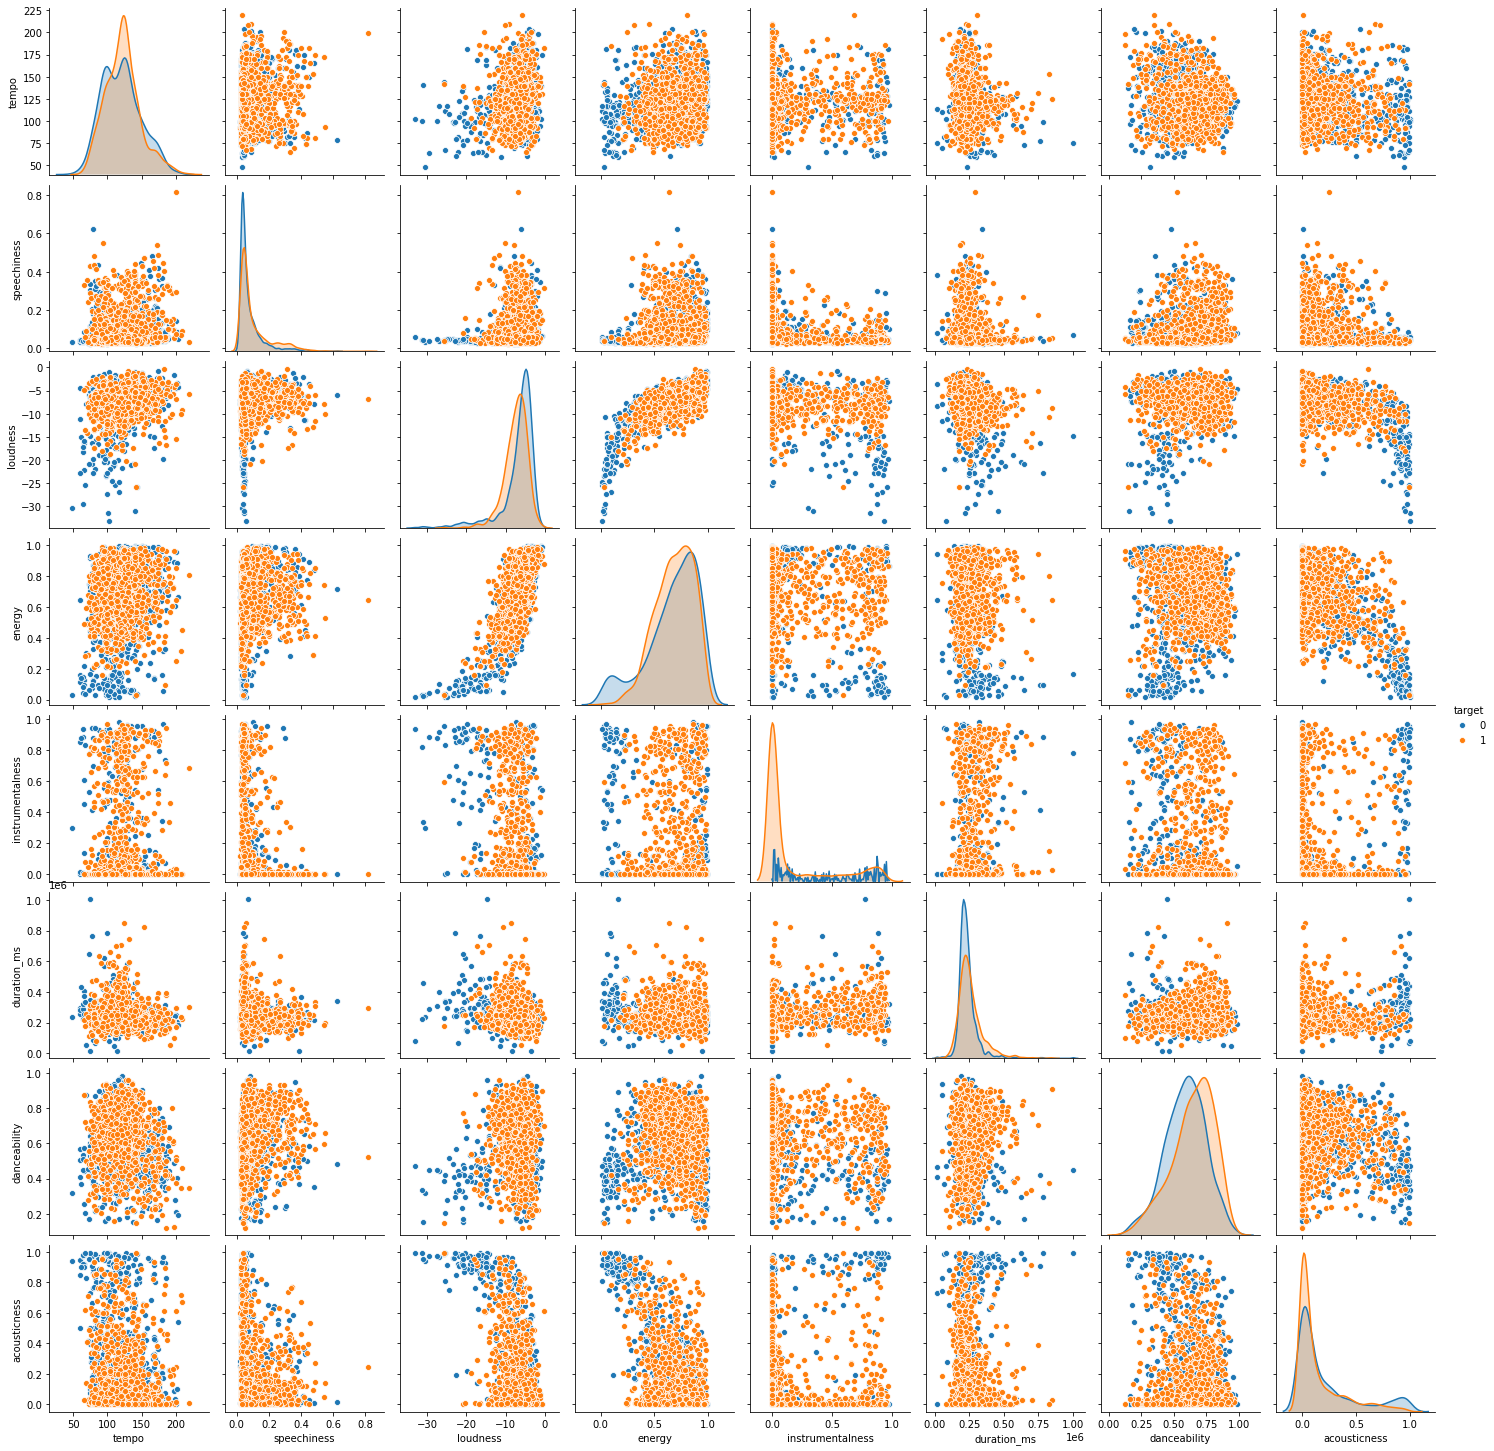

In [146]:
sns.pairplot(data, hue="target")

### Interpretação

Através dos gráficos de dispersão apresentados acima, é possível perceber que entre as categorias, dificilmente há alguma correlação tanto entre o banco de dados das músicas sucesso/fracasso quanto em tendências gerais. Porém, é possível afirmar que entre os features de energia e loudness há uma maior correlação pela proximidade do formato a uma reta. Além disso entre acousticness e loudness e acousticness e energy há uma correlação significativa também. Assim, pode-se dizer que quanto menor acústica, maiores são os ruídos, e há maior energia na música. Quanto ao gráfico da energia é razoável concluir que quanto maior a energia e os ruídos em uma música, mais chance dessa obter sucesso.

# Modelo 1 - Árvore de decisão

A árvore de decisão é um **modelo de predição** semelhante à um fluxograma capaz de gerar a visualização dos dados de acordo com determinados atributos. Essa possui diversas ramificações e em cada uma delas certa o computador toma certa decisão. A imagem gerada é um conjunto de tais possibilidades de **decisões** com suas respectivas informações.

### Etapa 1 - Separação da base de dados em 'teste' e 'treinamento'.
O DataFrame do **treinamento** é utilizado para treinar o computador de acordo com o modelo de predição escolhido. Após essa etapa, é realizado as predições do DataFrame **teste**. A partir desses, é possível determinar a acurácia do modelo.


No nosso projeto, as **features** são atributos das músicas como 'energia' e 'duração'.
Já o nosso **target** é uma coluna do DataFrame que indica se a música fez ou não sucesso representado por 0 ou 1.

In [51]:
# Lista que contém todas as features
features = ['tempo','speechiness', 'loudness', 'energy', 'instrumentalness','duration_ms','danceability','acousticness']

# Filtro do DataFrame (Apenas com as features)
X = data[features] 

# Filtro do DataFrame (Apenas com o target)
Y = data.target

# Divisão do DataFrame em teste e treinamento
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [52]:
# DataFrame treinamento que contém as features
X_train

,tempo,speechiness,loudness,energy,instrumentalness,duration_ms,danceability,acousticness
1921,90.020,0.0486,-7.775,0.553,0.000008,239933,0.675,0.08630
1400,129.750,0.0369,-10.562,0.126,0.000102,257187,0.679,0.85800
1009,139.725,0.3010,-5.841,0.780,0.000000,179009,0.494,0.35200
1479,106.002,0.1300,-5.341,0.638,0.009790,201387,0.615,0.00461
828,165.844,0.0514,-6.503,0.837,0.019700,271822,0.474,0.12700
...,...,...,...,...,...,...,...,...
1791,129.623,0.0392,-8.335,0.271,0.000000,246896,0.470,0.96200
1096,175.907,0.0508,-9.210,0.482,0.000194,193118,0.735,0.20500
1932,161.109,0.4100,-2.027,0.911,0.000000,254027,0.514,0.05590
235,102.960,0.0386,-3.886,0.578,0.006720,280427,0.757,0.01100


In [53]:
# DataFrame teste que contém as features
X_test

,tempo,speechiness,loudness,energy,instrumentalness,duration_ms,danceability,acousticness
351,145.306,0.0478,-5.437,0.858,0.000000,231765,0.612,0.012400
1471,97.900,0.0540,-3.794,0.737,0.000017,174031,0.546,0.050900
1658,124.994,0.0335,-5.449,0.923,0.000228,157452,0.624,0.026800
703,126.976,0.0461,-4.981,0.888,0.055100,299383,0.626,0.001520
1418,117.264,0.1850,-3.755,0.783,0.000000,291280,0.523,0.214000
...,...,...,...,...,...,...,...,...
874,137.895,0.0389,-11.815,0.404,0.759000,290587,0.438,0.577000
298,119.720,0.0322,-1.866,0.900,0.000102,200213,0.753,0.260000
1988,162.435,0.0349,-6.174,0.794,0.002040,209187,0.467,0.000084
1177,113.962,0.0862,-6.792,0.423,0.000000,176347,0.704,0.416000


In [54]:
# DataFrame treinamento que contém os valores do target
Y_train

1921    0
1400    0
1009    1
1479    0
828     1
       ..
1791    0
1096    0
1932    0
235     1
1061    0
Name: target, Length: 1411, dtype: int64

In [55]:
# DataFrame teste que contém os valores do target
Y_test

351     1
1471    0
1658    0
703     1
1418    0
       ..
874     1
298     1
1988    0
1177    0
602     1
Name: target, Length: 606, dtype: int64

### Etapa 2 - implementação do modelo

In [68]:
# Função da biblioteca DecisionTreeClassifier que implementa o modelo
clf = DecisionTreeClassifier(criterion="entropy")

# Treinamento do computador de acordo com a planilha treinamento
clf = clf.fit(X_train,Y_train)

# Predição do modelo realizado na planilha de teste
y_pred = clf.predict(X_test)

#Acuracia do modelo
print("Acurácia de acordo com a Árvore de Decisão:",metrics.accuracy_score(Y_test, y_pred))

Acurácia de acordo com a Árvore de Decisão: 0.6963696369636964


### Etapa 3 - Aperfeiçoamento do modelo

In [57]:
# Função da biblioteca DecisionTreeClassifier que implementa o modelo + Adição de argumentos à ela
clf = DecisionTreeClassifier(criterion="gini",max_depth=5)

# Treinamento do computador de acordo com a planilha treinamento
clf = clf.fit(X_train,Y_train)

# Predição do modelo realizado na planilha de teste
y_pred = clf.predict(X_test)

#Acuracia do modelo
print("Acuracia de acordo com a Árvore de Decisão:",metrics.accuracy_score(Y_test, y_pred))

Acuracia de acordo com a Árvore de Decisão: 0.731023102310231


### Etapa 4 - visualização do modelo
A fim de visualizar a árvore de decisão para compreender melhor o modelo de precisão foi utilizado uma função que recebe as features e o modelo realizado na etapa anterior

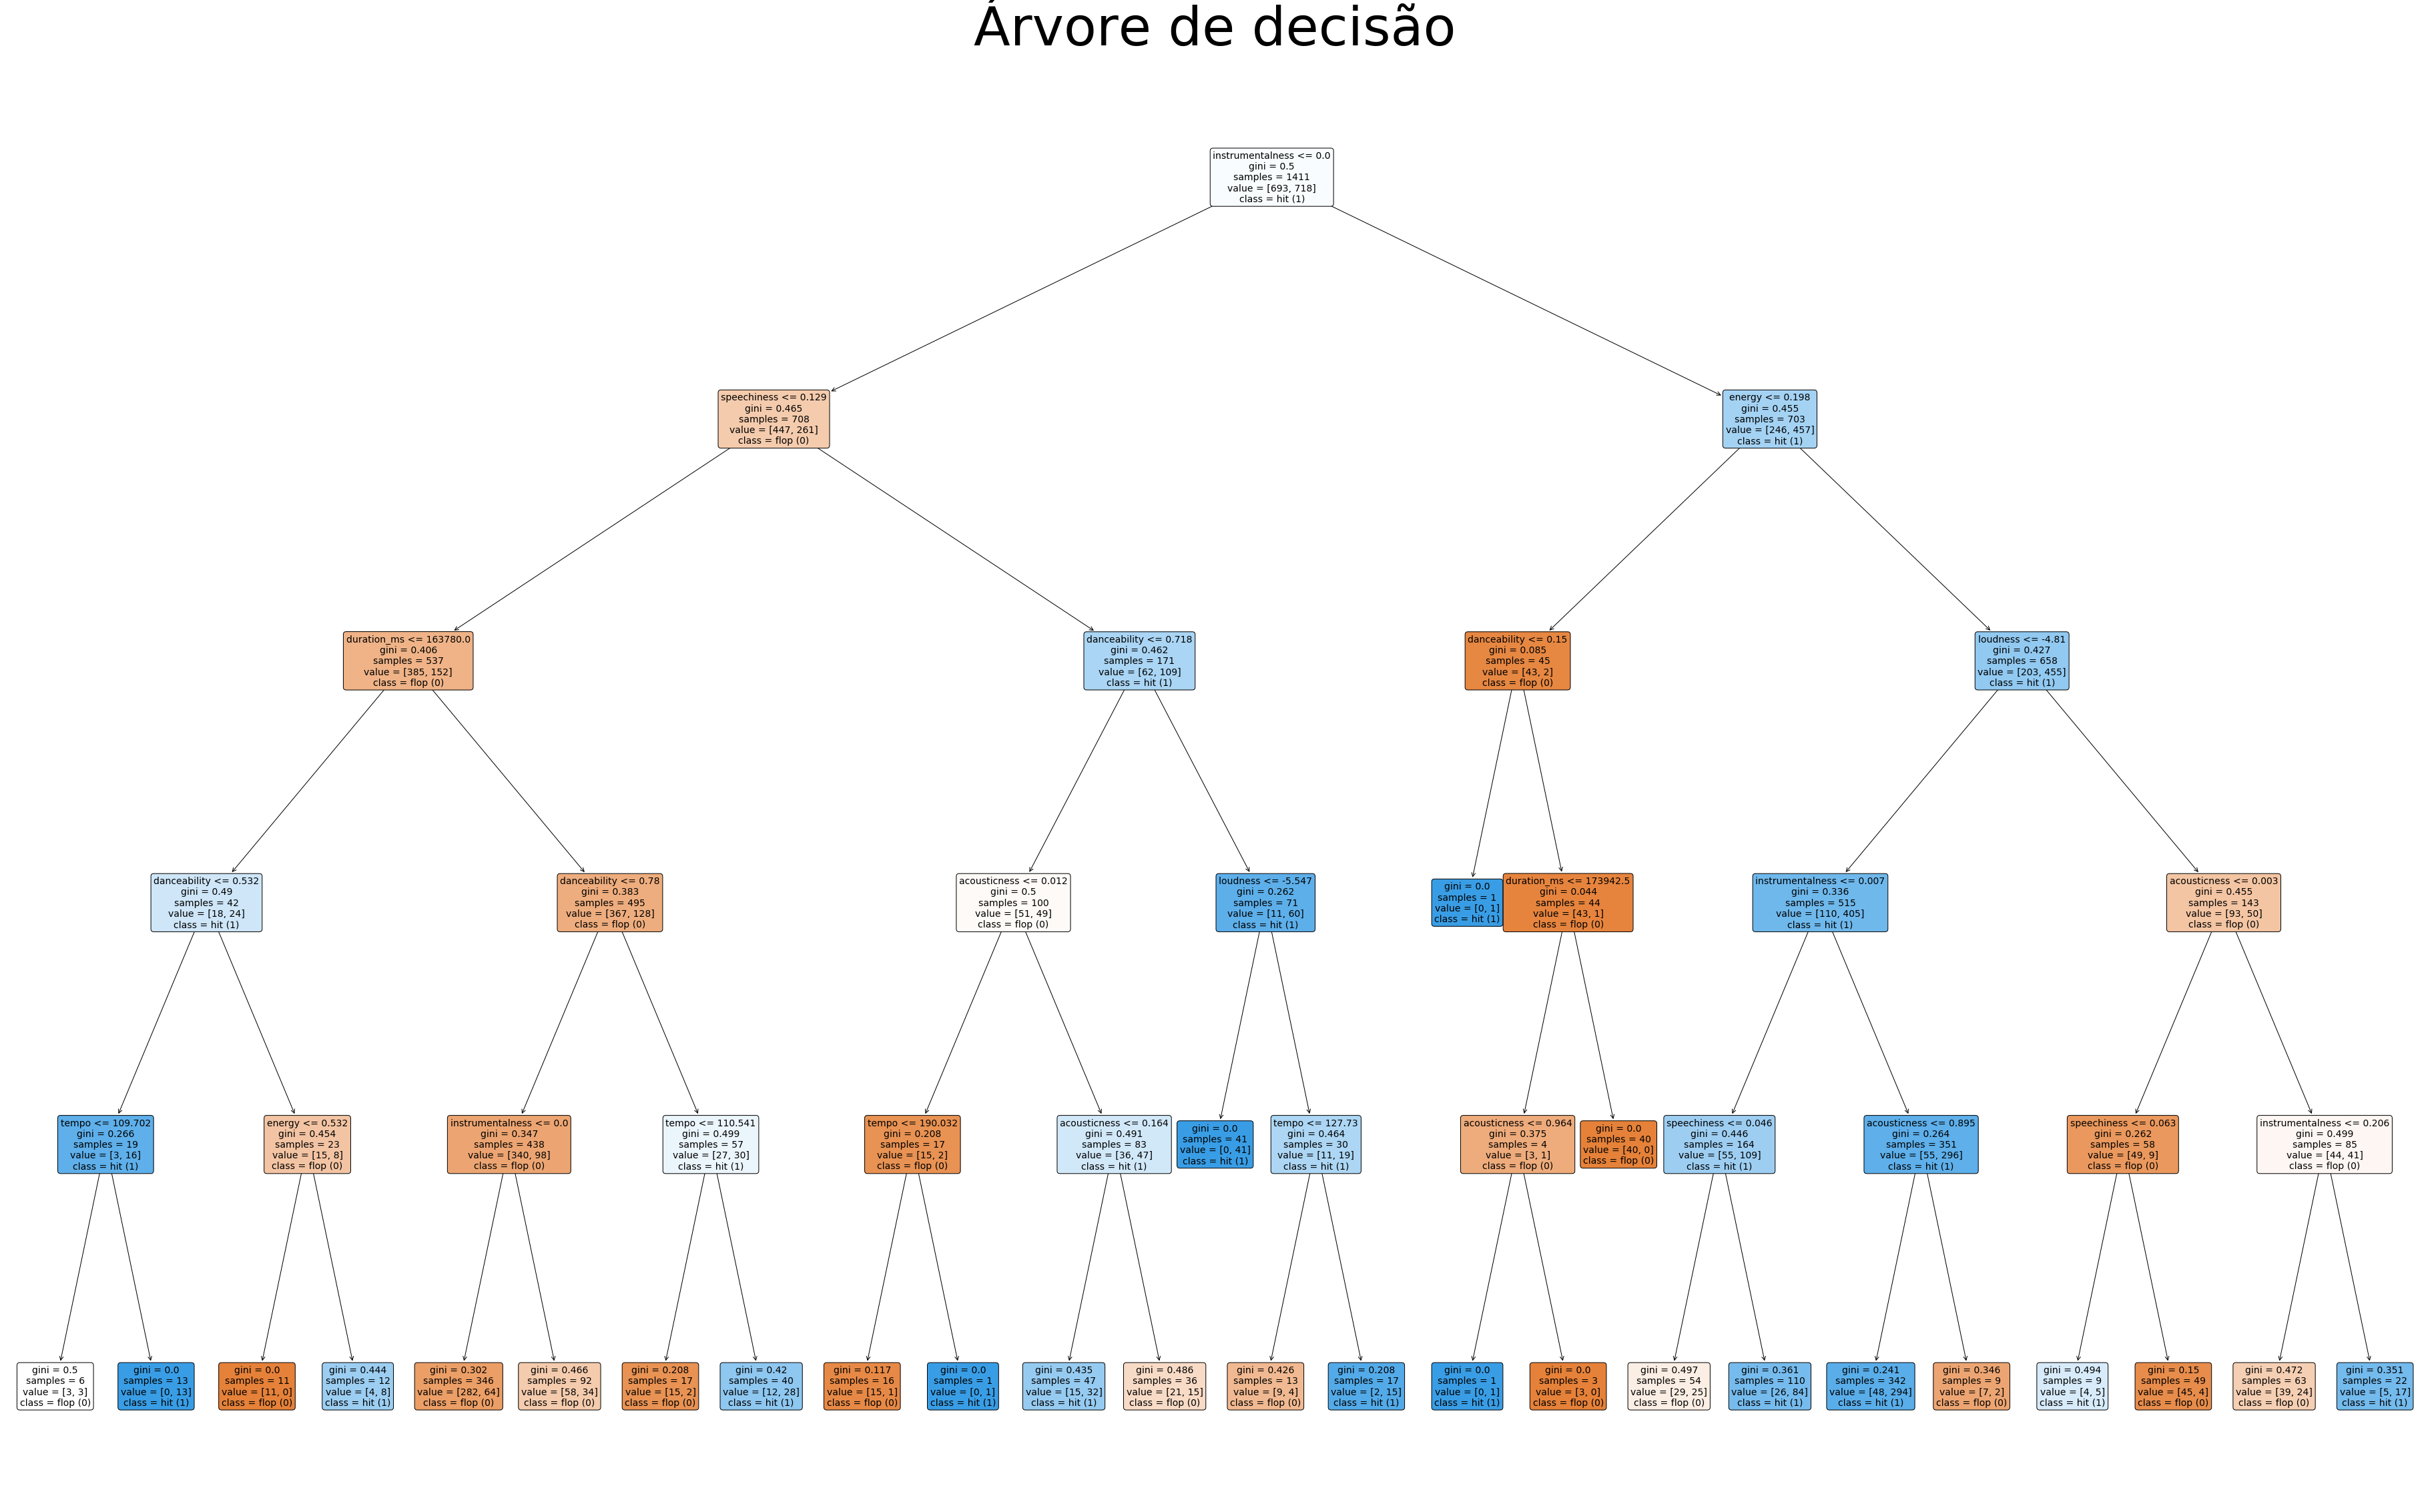

In [58]:
dic={'fontsize':80}

# Definindo o tamanho da imagem
plt.subplots(figsize = (65,40))

#Plotando a árvore de decisão
tree.plot_tree(clf, feature_names = features, filled = True,rounded=True,class_names=['flop (0)','hit (1)'], fontsize=14)
plt.title('Árvore de decisão',fontdict=dic)

#Salvando a imagem
plt.savefig('tree.png')

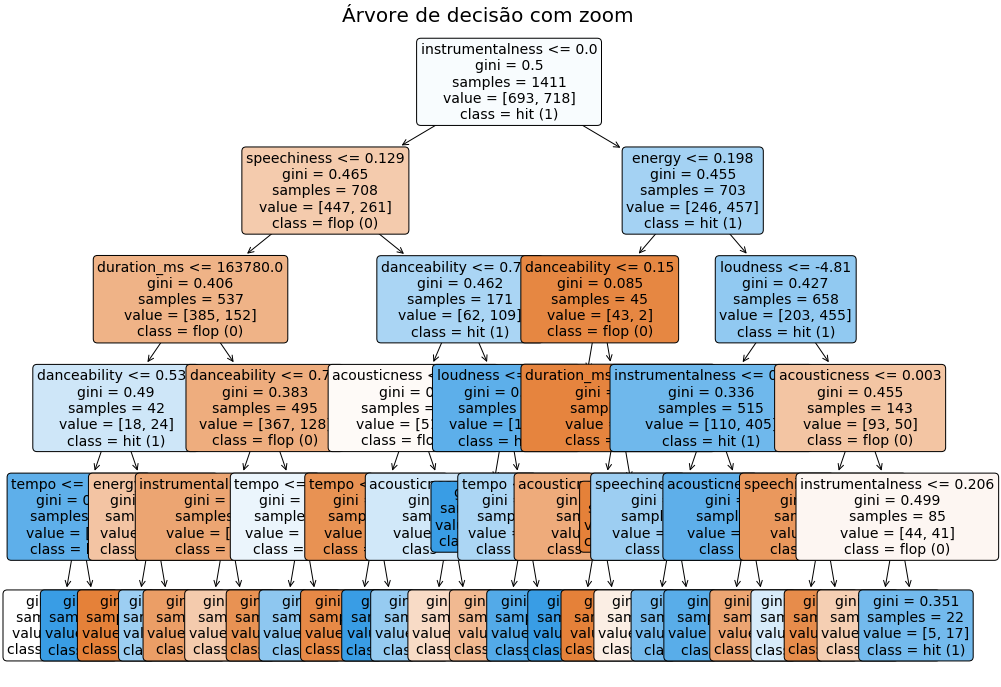

In [59]:
# Plotando a árvore com zoom para coompreender melhor as características de cada ramificação
dic={'fontsize':20}

# Definindo o tamanho da imagem
plt.subplots(figsize = (16,12))

#Plotando a árvore de decisão
tree.plot_tree(clf, feature_names = features, filled = True,rounded=True,class_names=['flop (0)','hit (1)'], fontsize=14)
plt.title('Árvore de decisão com zoom',fontdict=dic)

#Salvando a imagem
plt.savefig('tree_zoom.png')

In [60]:
print("Acuracia de acordo com a Árvore de Decisão:",metrics.accuracy_score(Y_test, y_pred))

Acuracia de acordo com a Árvore de Decisão: 0.731023102310231


## Conclusão - árvore de decisão:
Ao analisar a árvore de decisão acima, é possível perceber que os itens identificados pela cor azul contém a maior parte das músicas classificadas como 'hit'. Além disso, quanto maior a intensidade da cor, mais músicas são classificadas com a categoria representada pela cor. A acuracia do modelo foi de 73,10% e assim podemos considerar que a técnica utilizada é eficiente.

# Modelo 2 - Regressão Logística

### Introdução à técnica

A técnica de **Regressão Logística**, usada em *Machine Learning* para classificações, tem o objetivo de **determinar a probabilidade de ocorrência de evento da variável dependente**. No caso do nosso *target*, a variável é **binária**, ou seja, admite apenas dois valores 0 (fracasso: música não foi para o Billboard) ou 1 (sucesso: música foi para o Billboard). A fim de determinar a probabilidade do target de adquirir um certo valor no intervalo de 0 e 1, são usadas as **variáveis independentes**, denominadas de *features*.

### Aplicação da técnica

A Regressão Logística foi iniciada ao criar uma variável cuja função atribuída, realizará a **predição de sucesso ou fracasso** de determinada música a partir das **variáveis independentes (features)** do banco de dados de **Teste** e **Treinamento**.

In [61]:
regressao= LogisticRegression() # Implementação da Regressão Logística: variável regressao recebe a função do classificador
regressao.fit(X_train,Y_train) # Adequação da variável regressao ao dataframe de treinamento (X_train e Y_train)
y_pred_2=regressao.predict(X_test) # Criação da variável y_pred_2 para predição dos resultados da planilha Teste

C:\Users\isabe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Análise do desempenho do classificador

A *Confusion Matrix* ou **Matriz de Confusão** foi utilizada com o intuito de **melhorar a visualização e interpretação dos resultados obtidos pelo classificador** da técnica de Regressão Logística. Essa matriz foi exibida por meio de um *Heatmap* ou **Mapa de calor** que é uma ferramenta gráfica da biblioteca SeaBorn do Python que auxilia na visualização dos dados.

Acurácia do classificador:  0.5495049504950495


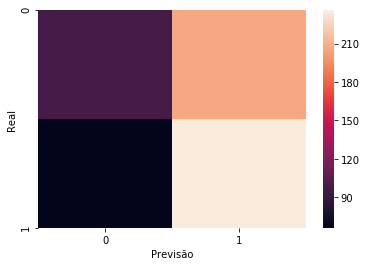

In [67]:
# Criação da Matriz de Confusão por meio da função crosstab do Pandas que monta uma tabela cruzada das features da planilha Teste pelos features previstos
matriz = pd.crosstab(Y_test, y_pred_2, rownames=['Real'], colnames=['Previsão']) # Função recebe os dados do banco de teste e do previsto e nomeia as linhas de colunas
sns.heatmap(matriz) # Criação do Mapa de calor através da função heatmap que recebe como argumento os dados da variável matriz
print('Acurácia do classificador: ',metrics.accuracy_score(Y_test, y_pred_2)) # Print do valor de acurácia obtido através da função que computa tal número ao comparar os dados de Teste com os previstos
plt.show() # Plota a Matriz de Confusão

In [63]:
matriz

Previsão,0,1
Real,,
0,97,207
1,66,236


### Interpretação dos resultados
Através do Mapa de Calor e da Matriz exibida no código anterior, é possível determinar a quantidade de falsos positivos, negativos e verdadeiros positivos e negativos.

#### Legenda Mapa de Calor
OBS: A cor exibida no Mapa de Calor se altera conforme a quantidade de elementos em cada categoria. A faixa na direita auxilia na compreensão de tal parâmetro.
<br>

Bloco Superior Esquerdo (Cor Roxa): <font color='blue'>Verdadeiros Negativos</font>
<br>

Bloco Superior Direito (Cor Bege): <font color='red'>Falsos Positivos </font>
<br>

Bloco Inferior Esquerdo (Cor Roxo Escuro): <font color='red'>Falsos Negativos</font> 
<br>

Bloco Superior Direito (Cor Rosa Claro): <font color='blue'>Verdadeiros Positivos</font>

#### Legenda Matriz de Confusão

<font color='blue'>Verdadeiros Negativos</font>: 97
<br>

<font color='blue'>Verdadeiros Positivos</font>: 236
<br>

<font color='red'>Falsos Negativos</font>: 66
<br>

<font color='red'>Falsos Positivos</font>: 207

### Curva COR

A **curva COR** (Característica de Operação do Receptor) é uma das maneiras de avaliar o classificador. A curva tracejada representa uma curva aleatória de um classificador qualquer, enquanto a azul mostra o comportamento da Regressão Logística. A qualidade de um classificador é avaliada conforme a **distância da linha tracejada**, ou seja, quanto mais distante, melhor o classificador.

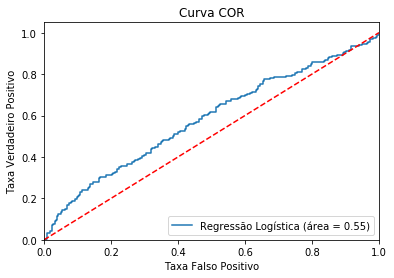

In [65]:
#Importa artifícios para plotar o gráfico
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y_test, regressao.predict(X_test)) # Variável que vai definir a qualidade do classificador
fpr, tpr, thresholds = roc_curve(Y_test, regressao.predict_proba(X_test)[:,1]) # Variável que vai definir a linha tracejada

#Plotando o gráfico
plt.figure()
plt.plot(fpr, tpr, label='Regressão Logística (área = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa Falso Positivo')
plt.ylabel('Taxa Verdadeiro Positivo')
plt.title('Curva COR')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Conclusões Gerais

Após a análise dos dois modelos, pode-se afirmar que o primeiro, o da **Árvore de decisão**, apresentou um resultado bom, com uma **acurácia de aproximadamente 69%**, assim se mostrando um modelo viável para prever o sucesso ou fracasso de uma música. Ela seria mais precisa ainda se em futuras iterações fossem estudadas as diferentes variáveis e suas influências mais minuciosamente, assim como aumentar o **banco de dados disponíveis e suas features**.


Já com o segundo modelo utilizando a **Regressão logística**, foi obtido uma **acurácia de aproximadamente 55%**, assim mostrando, que o primeiro modelo era um classificador mais fiel em suas predições. O segundo modelo obteve esse resultado tão baixo, pois ele analisa somente se a música foi um sucesso ou não, fazendo com que assim haja apenas um certo e errado, enquanto na Árvore de decisão, há varias **variáveis que são contabilizadas**,estas exploradas na análise exploratória inicial, chegando assim a um número muito melhor. Como já mencionado como sugestão ao primeiro modelo, um **maior banco de dados** também contribuiria para uma melhor predição.